# <font color='#1a5276'> <b> <center> Linear Regression - Training and validation data </center> </b> </font>

## <font color='blue'>  Table of Contents </font>

1. [Introduction](#1)
2. [Setup](#2)
3. [Data](#3) <br>
4. [Model, cost function and DataLoader](#4) <br>
5. [Training and predictions](#5)
6. [References](#references)

<a name="1"></a>
## <font color='blue'> <b> 1. Introduction </b> </font>

Now, we will use both training and validation data to train our linear regression model.

<a name="2"></a>
## <font color='blue'> <b> 2. Setup </b> </font>

In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [10]:
from torch import nn
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch import nn,optim
from torch.utils.data import Dataset, DataLoader
from torch import nn

<a name="3"></a>
## <font color='blue'> <b> 3. Data </b> </font>

The class will include the option to produce training or validation data. The training data will include outliers.

In [6]:
# Define a custom dataset class inheriting from PyTorch's Dataset class
class Data(Dataset):
    
    # Constructor: Initializes the dataset
    def __init__(self, train=True):
        # Generate input data: x values in the range [-3, 3) with step 0.1, reshaped to column vector
        self.x = torch.arange(-3, 3, 0.1).view(-1, 1)
        
        # Define the true function: f = -3x + 1
        self.f = -3 * self.x + 1
        
        # Add some noise to the output values, creating the noisy y values
        self.y = self.f + 0.1 * torch.randn(self.x.size())
        
        # Store the length of the dataset (number of samples)
        self.len = self.x.shape[0]
        
        # Introduce outliers if the dataset is for training
        if train:
            # Set the first data point as an outlier (y[0] = 0)
            self.y[0] = 0
            
            # Set a range of values as outliers (y[50:55] = 20)
            self.y[50:55] = 20
        else:
            # No modifications for the validation dataset
            pass
      
    # Getter: Return a specific data point at the given index
    def __getitem__(self, index):    
        return self.x[index], self.y[index]
    
    # Get Length: Return the number of data points in the dataset
    def __len__(self):
        return self.len


We will create 2 objects: one for training and one for validation.

In [7]:
train_data = Data()
val_data = Data(train = False)

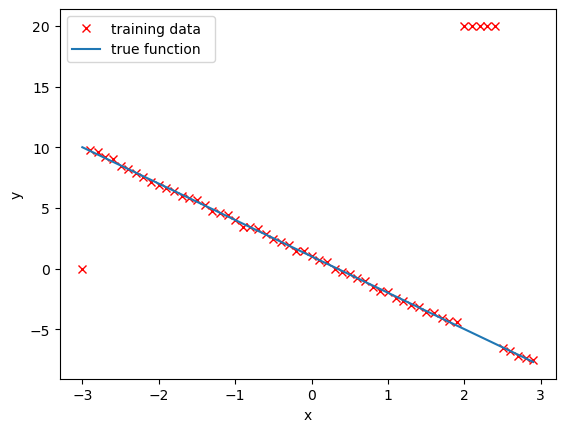

In [8]:
# Plot out training points
plt.plot(train_data.x.numpy(), train_data.y.numpy(), 'xr',label="training data ")
plt.plot(train_data.x.numpy(), train_data.f.numpy(),label="true function  ")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In the above plot we can see the presence of the outliers in the training data.

<a name="4"></a>
## <font color='blue'> <b> 4. Model, cost function and DataLoader </b> </font>

In [11]:
# Create Linear Regression Class
class linear_regression(nn.Module):
    
    # constructor
    def __init__(self, input_size, output_size):
        super(linear_regression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    # prediction
    def forward(self, x):
        yhat = self.linear(x)
        return yhat

In [12]:
# Create MSELoss function and DataLoader
criterion = nn.MSELoss()
trainloader = DataLoader(dataset = train_data, batch_size = 1)

<a name="5"></a>
## <font color='blue'> <b> 5. Training and predictions</b> </font>

In [14]:
# we will try different learning rates
learning_rates = [0.0001, 0.001, 0.01, 0.1]

In [28]:
def train_models(trainloader, train_data, val_data, iter, lr_list):
    """
    Trains multiple linear regression models with different learning rates and evaluates them on 
    training and validation datasets.

    Args:
    - trainloader: DataLoader containing the training data in batches.
    - train_data: Dataset containing the training data (features and labels).
    - val_data: Dataset containing the validation data (features and labels).
    - iter: Number of iterations (epochs) for training each model.
    - lr_list: List of learning rates to be tested.

    Returns:
    - models: List of trained models corresponding to each learning rate.
    - train_error: Tensor containing the training error for each model.
    - validation_error: Tensor containing the validation error for each model.
    """
    
    # to store the train error for each model (one model per learning rate)
    train_error = torch.zeros(len(lr_list))

    # to store the validation error for each model
    validation_error = torch.zeros(len(lr_list))
    
    # to store the different models
    models = []
    
    # iterate through the different learning rates
    for i, lr in enumerate(lr_list):
        # Initialize the model with 1 input and 1 output
        model = linear_regression(1, 1)
        
        # Initialize the optimizer with the current learning rate
        optimizer = optim.SGD(model.parameters(), lr=lr)
        
        # Train the model for a specified number of iterations (epochs)
        for epoch in range(iter):
            for x, y in trainloader:  # we train only with the training data
                # Perform a forward pass
                yhat = model(x)
                
                # Compute the loss (difference between predicted and true values)
                loss = criterion(yhat, y)
                
                # Zero the gradients before performing backpropagation
                optimizer.zero_grad()
                
                # Backward pass: compute the gradients
                loss.backward()
                
                # Update the model parameters using the optimizer
                optimizer.step()
        
        # After training, evaluate the model on the training data
        yhat = model(train_data.x)
        train_loss = criterion(yhat, train_data.y)
        train_error[i] = train_loss.item()
        
        # Evaluate the model on the validation data
        yhat = model(val_data.x)
        val_loss = criterion(yhat, val_data.y)
        validation_error[i] = val_loss.item()
        
        # Save the trained model
        models.append(model)

    return models, train_error, validation_error


In [29]:
res_models, res_train_error , res_val_error = train_models(trainloader, train_data, val_data, 10, learning_rates)

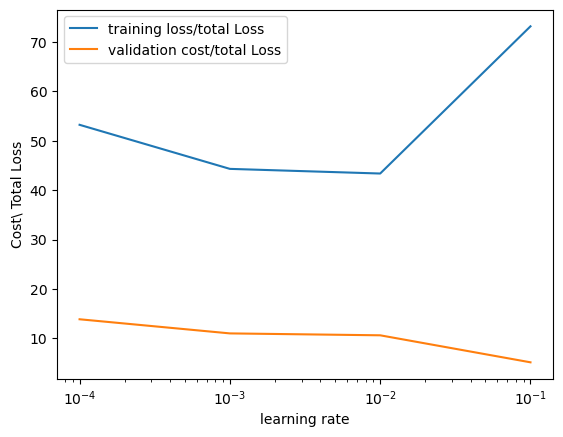

In [30]:
# Plot the training loss and validation loss
plt.semilogx(np.array(learning_rates), b.numpy(), label = 'training loss/total Loss')
plt.semilogx(np.array(learning_rates), c.numpy(), label = 'validation cost/total Loss')
plt.ylabel('Cost\ Total Loss')
plt.xlabel('learning rate')
plt.legend()
plt.show()

Predictions for each model:

i [[-0.11660258]
 [-0.1177423 ]
 [-0.11888202]]
i [[5.9250116]
 [5.806818 ]
 [5.6886244]]
i [[6.574045 ]
 [6.44049  ]
 [6.3069344]]
i [[14.278617]
 [13.850131]
 [13.421644]]


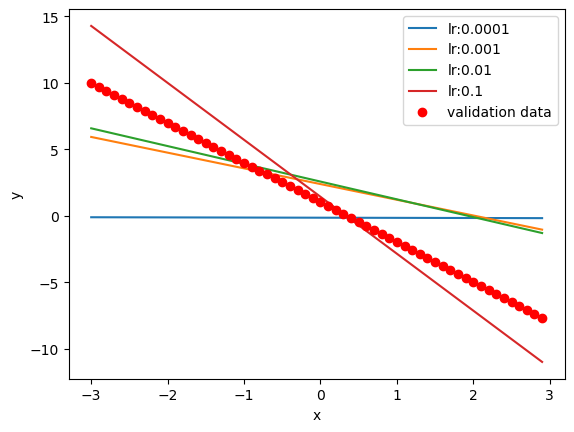

In [32]:
# Initialize index for iteration
i = 0

# Iterate through the models and their corresponding learning rates
for model, learning_rate in zip(res_models, learning_rates):
    # Make predictions (yhat) using the model on the validation data features (val_data.x)
    yhat = model(val_data.x)
    
    # Plot the predictions (yhat) against the validation data features (val_data.x)
    # .detach() is used to remove the tensor from the computation graph for visualization
    # .numpy() converts the tensor to a numpy array for plotting
    plt.plot(val_data.x.numpy(), yhat.detach().numpy(), label='lr:' + str(learning_rate))
    
    # Print the first 3 predicted values for debugging purposes
    print('i', yhat.detach().numpy()[0:3])

# Plot the actual validation data (f) as red circles ('or')
# This shows the true values of the validation data for comparison
plt.plot(val_data.x.numpy(), val_data.f.numpy(), 'or', label='validation data')

# Add labels for the x-axis and y-axis
plt.xlabel('x')
plt.ylabel('y')

# Display a legend that shows the learning rates for each model
plt.legend()

# Show the plot
plt.show()



<a name="references"></a>
## <font color='blue'> <b> References </b> </font>

[IBM AI Engineering Professional Certificate](https://www.coursera.org/professional-certificates/ai-engineer)